In [3]:
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NeighborhoodComponentsAnalysis
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


Text(0.5, 1.0, 'Background Removed Example')

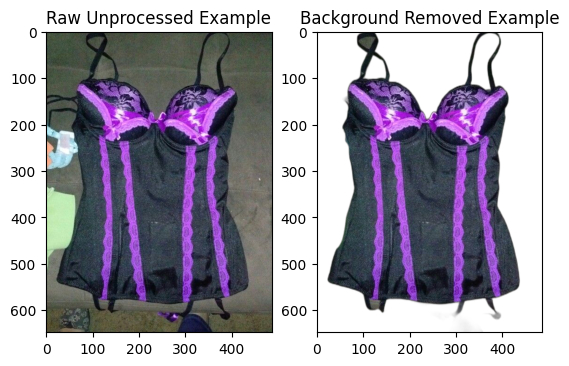

In [9]:
# plot raw RAW unprocessed image
# reading the image
import matplotlib.image as imgpt
rawImage = imgpt.imread('images/bustier_corset/pinterest_699324648411162597.jpg')
semiImage = imgpt.imread('rmbg_imgs/bustier_hourglass/pinterest_699324648411162597.jpg')

%matplotlib inline 
# displaying the image
plt.subplot(1,2,1)
plt.imshow(rawImage)
plt.title("Raw Unprocessed Example")

plt.subplot(1,2,2)
plt.imshow(semiImage)
plt.title("Background Removed Example")

In [10]:
# load numpy array from npy file
images = load('images.npy')
labels = load('labels.npy')

Text(0.5, 1.0, '(Label: babydoll/trapeze)')
Text(0.5, 1.0, '(Label: bustier/hourglass)')
Text(0.5, 1.0, '(Label: tshirt/straight)')


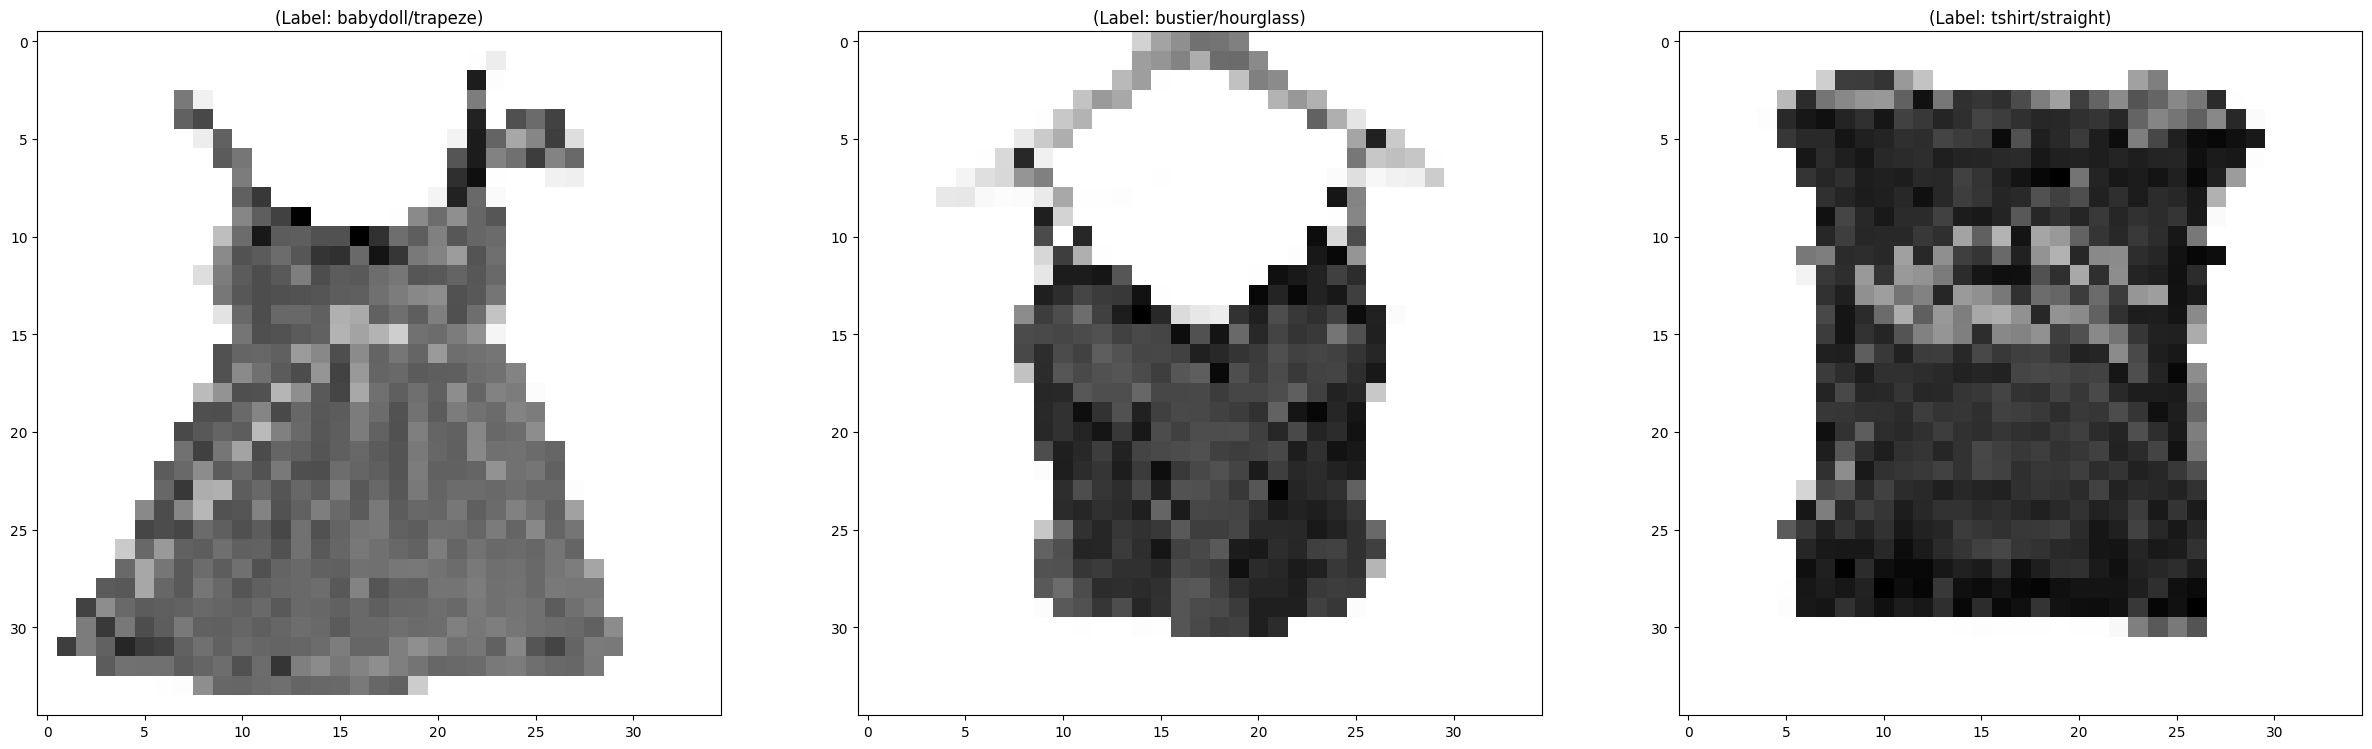

In [11]:
# plot first image of each class

label_list = {
    0: 'babydoll/trapeze',
    1: 'bustier/hourglass',
    2: 'tshirt/straight',
}

 # first image of each class
values = [0, 435, 870]

%matplotlib inline

plt.figure(figsize = [30,15])

for i in range(3):
    plt.subplot(1,3,i+1)
    im = np.reshape(images[values[i]],(35,35))
    plt.imshow(im, cmap='gray_r')
    print(plt.title("(Label: " + str(label_list[labels[values[i]]]) + ")"))

In [12]:
# choosing train test split to test optimal parameters for classification methods
# train size = 0.85 because dataset is small

xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)

In [13]:
# use gridsearchcv with RAW DATA to determine optimal size K
knn = KNeighborsClassifier()
k_range = list(range(1, 50))
distance = [2]
param_grid = dict(n_neighbors=k_range, p=distance)
  
# defining parameter range
# cv =5 cross validation folds for each k value
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


Accuracy for our training dataset with tuning is : 83.68%
{'n_neighbors': 3, 'p': 2}


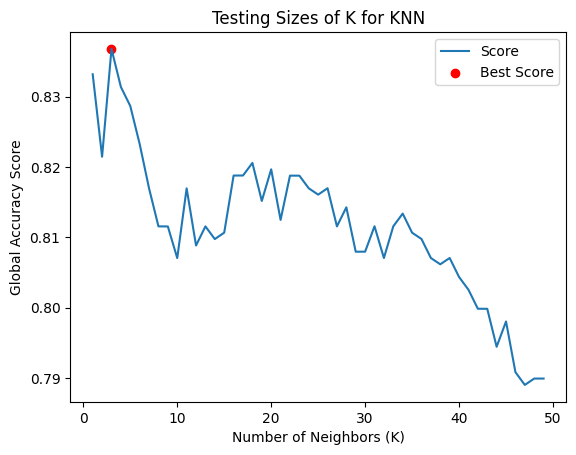

In [14]:
# optimal size k
allgridscores = list(grid_search.cv_results_['mean_test_score'])
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(grid_search.best_score_ *100) )
print(grid_search.best_params_)

plt.plot(k_range, allgridscores, label='Score')
plt.scatter(k_range[2], allgridscores[2], label='Best Score', color='red')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Global Accuracy Score')
plt.title('Testing Sizes of K for KNN')
plt.legend()

In [15]:
# find optimal params for non-linear svm using raw data
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
svm_grid=GridSearchCV(svc,param_grid, scoring='accuracy', verbose=1)

# fitting the model for grid search
svm_gridsearch = svm_grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [16]:
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(svm_gridsearch.best_score_ *100) )
print(svm_gridsearch.best_params_)

Accuracy for our training dataset with tuning is : 89.18%
{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [17]:
results_svm = svm_gridsearch.cv_results_
svmtable = pd.DataFrame(results_svm)
svmtable.drop(['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score'], axis=1, inplace=True)
svmtable = svmtable.sort_values(by=['rank_test_score']).head(10)
# to add to pdf
print(svmtable.to_latex(index=False,
                  float_format="{:.5f}".format,))

\begin{tabular}{rrrrlllrrr}
\toprule
 mean\_fit\_time &  std\_fit\_time &  mean\_score\_time &  std\_score\_time & param\_C & param\_gamma & param\_kernel &  mean\_test\_score &  std\_test\_score &  rank\_test\_score \\
\midrule
       0.97733 &       0.18966 &          0.03727 &         0.00303 &       1 &           1 &         poly &          0.89178 &         0.00961 &                1 \\
       4.74502 &       1.07780 &          0.17183 &         0.08391 &     100 &     0.10000 &         poly &          0.89178 &         0.00961 &                1 \\
       1.83878 &       0.82175 &          0.06710 &         0.02165 &      10 &           1 &         poly &          0.89178 &         0.00961 &                1 \\
       2.08071 &       0.63645 &          0.06739 &         0.01225 &      10 &     0.10000 &         poly &          0.89178 &         0.00961 &                1 \\
       2.29620 &       0.63265 &          0.09487 &         0.09488 &       1 &     0.10000 &         poly 

/var/folders/j2/8gptfrvd0_dfl_yxfcck_hh40000gn/T/ipykernel_35091/246238813.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(svmtable.to_latex(index=False,


In [18]:
# initiate optimal knn model 
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2)
# initiate optimal svm model 
svc=svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True)

# fit raw data
knn.fit(xtrain, ytrain)
svc.fit(xtrain, ytrain)

# predict 
pred_knn = knn.predict(xtest)
knn_score = accuracy_score(ytest, pred_knn)
knn_confusion = confusion_matrix(ytest, pred_knn)
print("Overall Accuracy: {0:.2f}".format(knn_score))

pred_svc = svc.predict(xtest)
svc_score = accuracy_score(ytest, pred_svc)
svc_confusion = confusion_matrix(ytest, pred_svc)
print("Overall Accuracy: {0:.2f}".format(svc_score))

Overall Accuracy: 0.84
Overall Accuracy: 0.92


In [19]:
# create df from svc-pca confusion matrix 
svcFP = svc_confusion.sum(axis=0) - np.diag(svc_confusion)  
svcFN = svc_confusion.sum(axis=1) - np.diag(svc_confusion)
svcTP = np.diag(svc_confusion)
svcTN = svc_confusion.sum() - (svcFP + svcFN + svcTP)
# Sensitivity, hit rate, recall, or true positive rate
svcTPR = svcTP/(svcTP+svcFN)
# Specificity or true negative rate
svcTNR = svcTN/(svcTN+svcFP) 
# Overall accuracy
svcACC = (svcTP+svcTN)/(svcTP+svcFP+svcFN+svcTN)
# create table
svc_df = pd.DataFrame({'CLASS': np.array([0,1,2]), 'FP': svcFP, 'FN': svcFN, 'TP': svcTP, 'TN': svcTN, 'SENSITIVITY': svcTPR, 'SPECIFICITY': svcTNR, 'ACCURACY': svcACC})
svc_df.set_index('CLASS', inplace=True)

# create df from knn-pca confusion matrix 
knnFP = knn_confusion.sum(axis=0) - np.diag(knn_confusion)  
knnFN = knn_confusion.sum(axis=1) - np.diag(knn_confusion)
knnTP = np.diag(knn_confusion)
knnTN = knn_confusion.sum() - (knnFP + knnFN + knnTP)
# Sensitivity, hit rate, recall, or true positive rate
knnTPR = knnTP/(knnTP+knnFN)
# Specificity or true negative rate
knnTNR = knnTN/(knnTN+knnFP) 
# Overall accuracy
knnACC = (knnTP+knnTN)/(knnTP+knnFP+knnFN+knnTN)
# create table
knn_df = pd.DataFrame({'CLASS': np.array([0,1,2]), 'FP': knnFP, 'FN': knnFN, 'TP': knnTP, 'TN': knnTN, 'SENSITIVITY': knnTPR, 'SPECIFICITY': knnTNR, 'ACCURACY': knnACC})
knn_df.set_index('CLASS', inplace=True)

## PCA representation 

In [20]:
# initiate PCA
pca = PCA(n_components=1225)
# project our data into PC space
pca_images = pca.fit_transform(images)

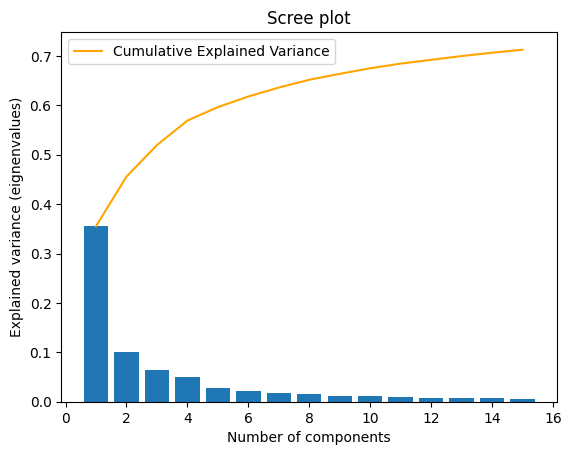

In [21]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_[0:15])+1),
    pca.explained_variance_ratio_[0:15]
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ratio_[0:15])+1),
    np.cumsum(pca.explained_variance_ratio_[0:15]),
    c='orange',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

In [22]:
# initiate optimal knn model to test the optimal pca dimensions
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2)
# initiate optimal svm model to test optimal pca
svc=svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True)

# percentage of explained variance to test
ncomponents = np.array([0.7,0.72,0.74,0.76,0.78,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96])
test_Scores = []
svmtest_Scores = []

for i in ncomponents:
    tryPCA = PCA(n_components= i)
    transformed = tryPCA.fit_transform(images)
    basis = np.dot(transformed, tryPCA.components_)
    xtrain, xtest, ytrain, ytest = train_test_split(basis, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)
    knn.fit(xtrain, ytrain)
    svc.fit(xtrain, ytrain)
    ypredknn = knn.predict(xtest)
    knnout = accuracy_score(ytest, ypredknn)
    test_Scores.append(knnout)
    ypredsvc = svc.predict(xtest)
    svcout = accuracy_score(ytest, ypredsvc)
    svmtest_Scores.append(svcout)

In [23]:
print(test_Scores[3])
print(svmtest_Scores[2])
print(svmtest_Scores[3])

0.9030612244897959
0.9183673469387755
0.9132653061224489


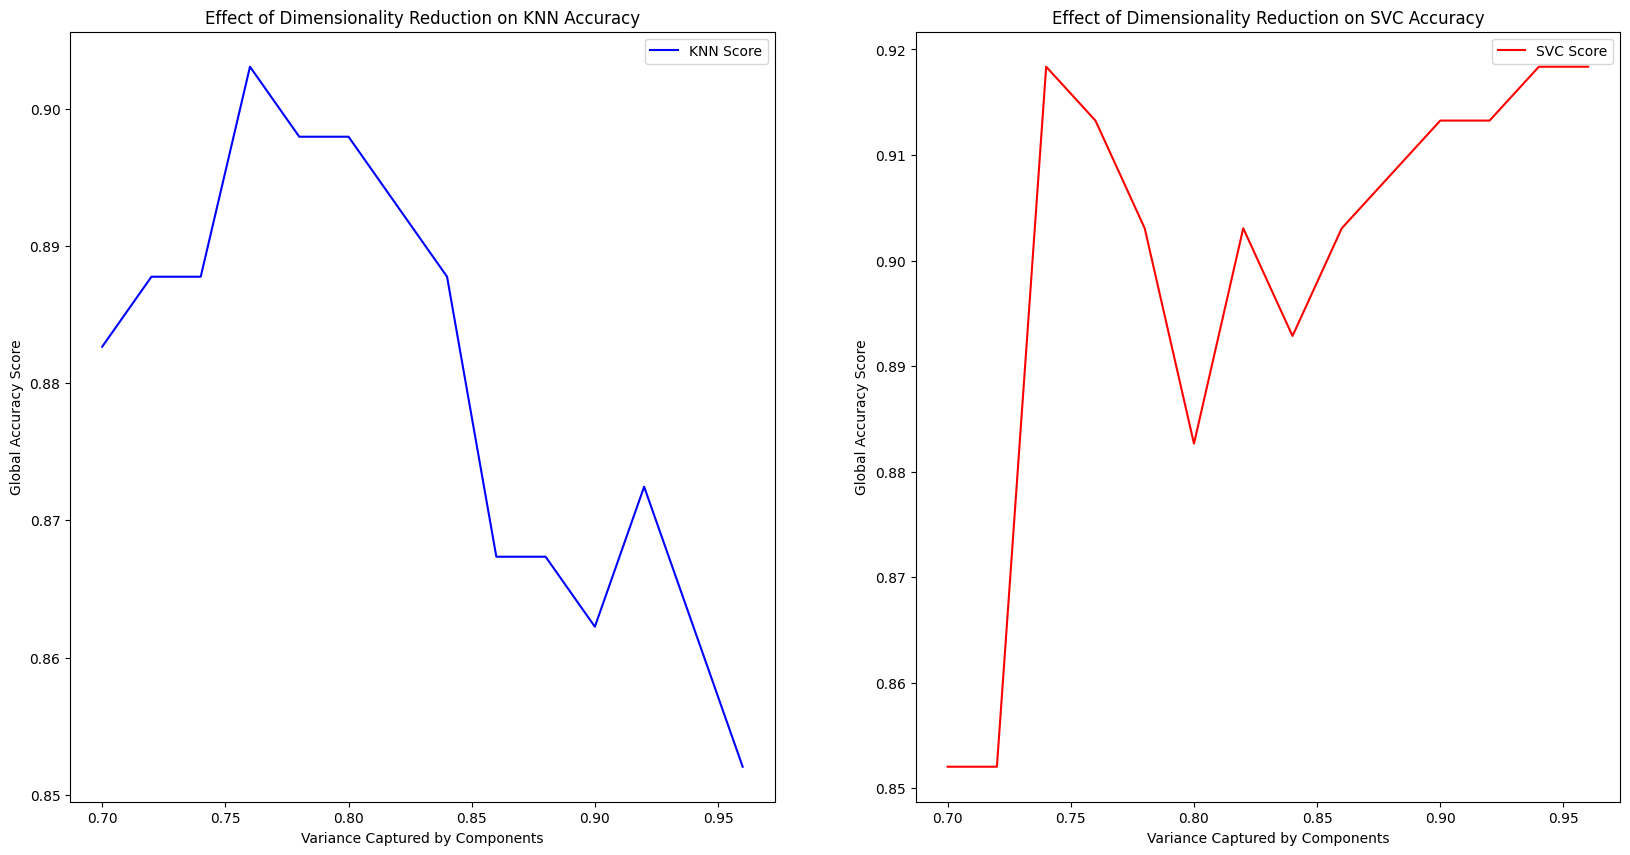

In [24]:
# compare results 

%matplotlib inline

plt.figure(figsize = [20,10])

plt.subplot(1,2,1)
plt.plot(ncomponents, test_Scores, color='b', label='KNN Score')
plt.xlabel('Variance Captured by Components')
plt.ylabel('Global Accuracy Score')
plt.title('Effect of Dimensionality Reduction on KNN Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(ncomponents, svmtest_Scores, color='red',label='SVC Score')
plt.xlabel('Variance Captured by Components')
plt.ylabel('Global Accuracy Score')
plt.title('Effect of Dimensionality Reduction on SVC Accuracy')
plt.legend()
plt.show()

In [27]:
# recreate optimal combinations
bestPCA = PCA(n_components= 0.76)
transformed = bestPCA.fit_transform(images)
basis = np.dot(transformed, bestPCA.components_)
xtrain, xtest, ytrain, ytest = train_test_split(basis, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)

# fit models again 
knn.fit(xtrain, ytrain)
svc.fit(xtrain, ytrain)

# predict 
pred_pcaknn = knn.predict(xtest)
knn_pca_score = accuracy_score(ytest, pred_pcaknn)
knn_pca_confusion = confusion_matrix(ytest, pred_pcaknn)
print("Overall Accuracy: {0:.2f}".format(knn_pca_score))

pred_pcasvc = svc.predict(xtest)
svc_pca_score = accuracy_score(ytest, pred_pcasvc)
svc_pca_confusion = confusion_matrix(ytest, pred_pcasvc)
print("Overall Accuracy: {0:.2f}".format(svc_pca_score))

Overall Accuracy: 0.90
Overall Accuracy: 0.91


In [101]:
bestPCA.components_

(27, 1225)

In [102]:
transformed.shape

(1305, 27)

In [103]:
basis.shape

(1305, 1225)

27
Text(0.5, 1.0, '(Label: babydoll/trapeze)')
Text(0.5, 1.0, '(Label: bustier/hourglass)')
Text(0.5, 1.0, '(Label: tshirt/straight)')


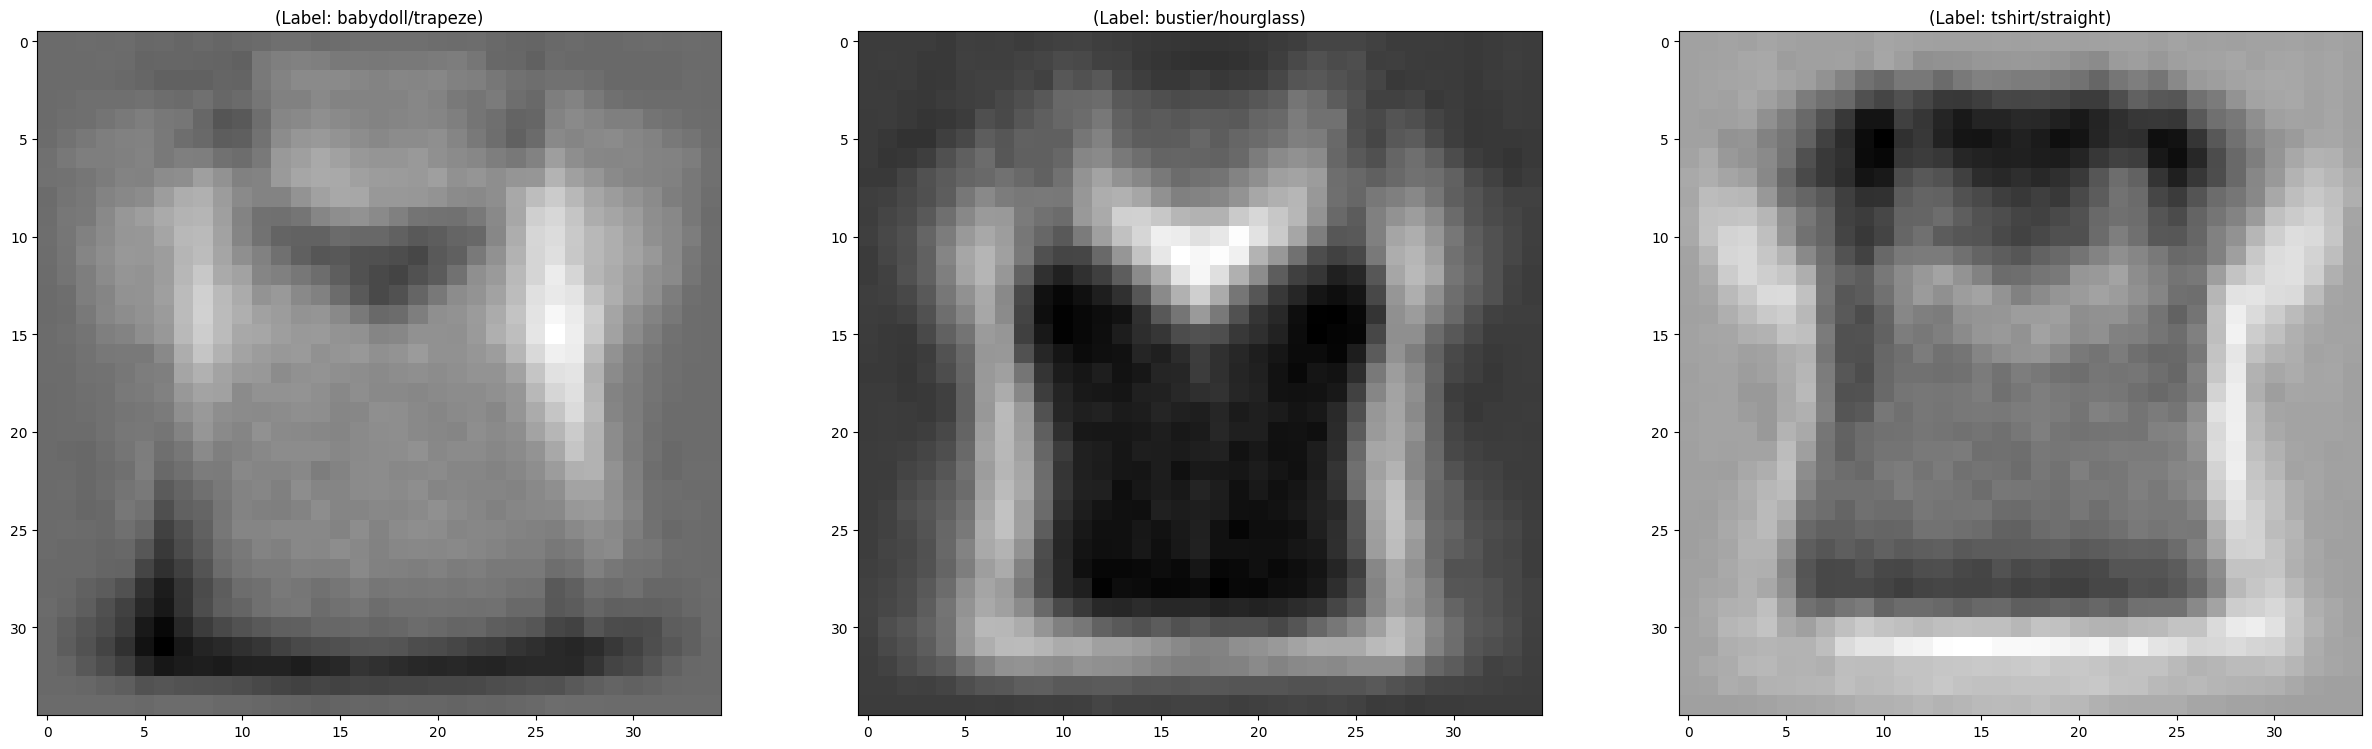

In [28]:
 # first image of each class RECONSTRUCTED AFTER PCA
# number of components kept
print(bestPCA.n_components_)
values = [0, 435, 870]
%matplotlib inline
plt.figure(figsize = [30,15])
for i in range(3):
    plt.subplot(1,3,i+1)
    im = np.reshape(basis[values[i]],(35,35))
    plt.imshow(im, cmap='gray_r')
    print(plt.title("(Label: " + str(label_list[labels[values[i]]]) + ")"))

In [29]:
# create df from svc-pca confusion matrix 
svcpcaFP = svc_pca_confusion.sum(axis=0) - np.diag(svc_pca_confusion)  
svcpcaFN = svc_pca_confusion.sum(axis=1) - np.diag(svc_pca_confusion)
svcpcaTP = np.diag(svc_pca_confusion)
svcpcaTN = svc_pca_confusion.sum() - (svcpcaFP + svcpcaFN + svcpcaTP)
# Sensitivity, hit rate, recall, or true positive rate
svcpcaTPR = svcpcaTP/(svcpcaTP+svcpcaFN)
# Specificity or true negative rate
svcpcaTNR = svcpcaTN/(svcpcaTN+svcpcaFP) 
# Overall accuracy
svcpcaACC = (svcpcaTP+svcpcaTN)/(svcpcaTP+svcpcaFP+svcpcaFN+svcpcaTN)
# create table
svcpca_df = pd.DataFrame({'CLASS': np.array([0,1,2]), 'FP': svcpcaFP, 'FN': svcpcaFN, 'TP': svcpcaTP, 'TN': svcpcaTN, 'SENSITIVITY': svcpcaTPR, 'SPECIFICITY': svcpcaTNR, 'ACCURACY': svcpcaACC})
svcpca_df.set_index('CLASS', inplace=True)

# create df from knn-pca confusion matrix 
knnpcaFP = knn_pca_confusion.sum(axis=0) - np.diag(knn_pca_confusion)  
knnpcaFN = knn_pca_confusion.sum(axis=1) - np.diag(knn_pca_confusion)
knnpcaTP = np.diag(knn_pca_confusion)
knnpcaTN = knn_pca_confusion.sum() - (knnpcaFP + knnpcaFN + knnpcaTP)
# Sensitivity, hit rate, recall, or true positive rate
knnpcaTPR = knnpcaTP/(knnpcaTP+knnpcaFN)
# Specificity or true negative rate
knnpcaTNR = knnpcaTN/(knnpcaTN+knnpcaFP) 
# Overall accuracy
knnpcaACC = (knnpcaTP+knnpcaTN)/(knnpcaTP+knnpcaFP+knnpcaFN+knnpcaTN)
# create table
knnpca_df = pd.DataFrame({'CLASS': np.array([0,1,2]), 'FP': knnpcaFP, 'FN': knnpcaFN, 'TP': knnpcaTP, 'TN': knnpcaTN, 'SENSITIVITY': knnpcaTPR, 'SPECIFICITY': knnpcaTNR, 'ACCURACY': knnpcaACC})
knnpca_df.set_index('CLASS', inplace=True)

## Kernel PCA Representation

Limitations of using kernel PCA:


The value of gamma for the ‘rbf’, ‘poly’ and ‘sigmoid’ kernels should be specified by the user as a hyperparameter. It requires implementing a hyperparameter tuning technique such as Random Search or Grid Search.
Unlike in PCA, the n_component hyperparameter does not accept a float value. So, we cannot select the best number of components by specifying the amount of variance that needs to be explained by the principal components.

In [114]:
from sklearn.metrics import mean_squared_error
def my_scorer(estimator, X, y=None):
    X_reduced = estimator.transform(X)
    X_preimage = estimator.inverse_transform(X_reduced)
    return -1 * mean_squared_error(X, X_preimage)

param_grid = [{
        "gamma": np.linspace(0.03, 0.05, 10),
        "kernel": ["rbf", "sigmoid", "linear", "poly"]
    }]

kpca=KernelPCA(fit_inverse_transform=True) 
grid_search = GridSearchCV(kpca, param_grid, cv=3, scoring=my_scorer)
grid_search.fit(images)

/Users/irisyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_kernel_pca.py:399: LinAlgWarning: Ill-conditioned matrix (rcond=3.67317e-08): result may not be accurate.
  self.dual_coef_ = linalg.solve(K, X, assume_a="pos", overwrite_a=True)
/Users/irisyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_kernel_pca.py:399: LinAlgWarning: Ill-conditioned matrix (rcond=3.78084e-08): result may not be accurate.
  self.dual_coef_ = linalg.solve(K, X, assume_a="pos", overwrite_a=True)
/Users/irisyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_kernel_pca.py:399: LinAlgWarning: Ill-conditioned matrix (rcond=3.21517e-08): result may not be accurate.
  self.dual_coef_ = linalg.solve(K, X, assume_a="pos", overwrite_a=True)
/Users/irisyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_kernel_pca.py:399: LinAlgWarning: Ill-conditioned matrix (rcond=2.14306e-08): result may not be accurate.
  self.dual_coef_ = linalg.solve(K, X, as

KeyboardInterrupt: 

In [111]:
from sklearn.metrics import mean_squared_error

# find the optimal kpca hyper parameters  
from sklearn.pipeline import Pipeline

clf = Pipeline([
 ("kpca", KernelPCA()),
 ("knn", KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2))
 ])
param_grid = [{
 "kpca__n_components": [20, 40, 60, 80, 100, 200, 300, 400, 500, 600],
 "kpca__gamma": np.linspace(0.01, 0.05, 15),
 "kpca__kernel": ["rbf", "sigmoid","poly"]
 }]
kpcagrid_search = GridSearchCV(clf, param_grid, cv=3)
kpcagrid_search.fit(images, labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid=[{'kpca__gamma': array([0.01      , 0.01285714, 0.01571429, 0.01857143, 0.02142857,
       0.02428571, 0.02714286, 0.03      , 0.03285714, 0.03571429,
       0.03857143, 0.04142857, 0.04428571, 0.04714286, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid', 'poly'],
                          'kpca__n_components': [20, 40, 60, 80, 100, 200, 300,
                                                 400, 500, 600]}])

Accuracy for our training dataset with tuning is : 86.74%
{'kpca__gamma': 0.012857142857142857, 'kpca__kernel': 'rbf', 'kpca__n_components': 80}


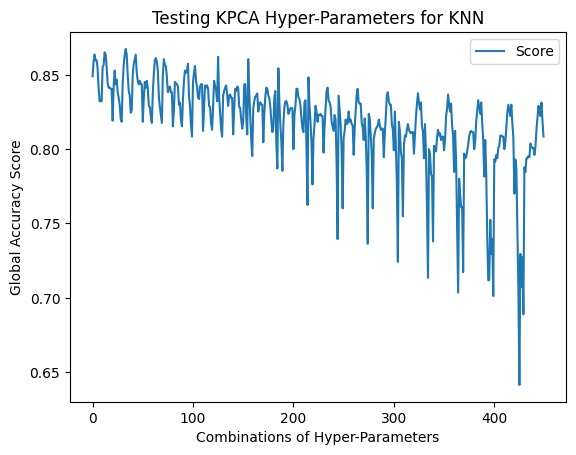

In [64]:
# plot scores from gridsearch for optimal hyperparameters for KPCA and KNN
kpcaallgridscores = list(kpcagrid_search.cv_results_['mean_test_score'])
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(kpcagrid_search.best_score_ *100) )
print(kpcagrid_search.best_params_)

plt.plot(list(range(len(kpcaallgridscores))), kpcaallgridscores, label='Score')
# plt.scatter(k_range[2], allgridscores[2], label='Best Score', color='red')
plt.xlabel('Combinations of Hyper-Parameters')
plt.ylabel('Global Accuracy Score')
plt.title('Testing KPCA Hyper-Parameters for KNN')
plt.legend()

In [67]:
# create table 
kpcaknntable = pd.DataFrame(kpcagrid_search.cv_results_)
kpcaknntable = kpcaknntable.sort_values(by=['rank_test_score']).head(5)
# to add to pdf
print(kpcaknntable.to_latex(index=False,
                  float_format="{:.5f}".format,))

\begin{tabular}{rrrrllllrrrrrr}
\toprule
 mean\_fit\_time &  std\_fit\_time &  mean\_score\_time &  std\_score\_time & param\_kpca\_\_gamma & param\_kpca\_\_kernel & param\_kpca\_\_n\_components &                                             params &  split0\_test\_score &  split1\_test\_score &  split2\_test\_score &  mean\_test\_score &  std\_test\_score &  rank\_test\_score \\
\midrule
       0.27489 &       0.15448 &          0.08991 &         0.01996 &           0.01286 &                rbf &                       80 & \{'kpca\_\_gamma': 0.012857142857142857, 'kpca\_\_ke... &            0.87356 &            0.88046 &            0.84828 &          0.86743 &         0.01384 &                1 \\
       1.74182 &       1.17135 &          0.07984 &         0.01996 &           0.01000 &            sigmoid &                       60 & \{'kpca\_\_gamma': 0.01, 'kpca\_\_kernel': 'sigmoid'... &            0.86437 &            0.88736 &            0.84368 &          0.86513 &         0.01784

/var/folders/j2/8gptfrvd0_dfl_yxfcck_hh40000gn/T/ipykernel_35091/1016460722.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(kpcaknntable.to_latex(index=False,


In [71]:
# svc grid search
clfsvc = Pipeline([
 ("kpca", KernelPCA()),
 ("svc", svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True))
 ])
param_grid = [{
 "kpca__n_components": [20, 40, 60, 80, 100, 200, 300, 400, 600],
 "kpca__gamma": np.linspace(0.01, 0.05, 15),
 "kpca__kernel": ["rbf", "sigmoid", "poly"]
 }]
kpcagrid_searchsvc = GridSearchCV(clfsvc, param_grid, cv=3)
kpcagrid_searchsvc.fit(images, labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA()),
                                       ('svc',
                                        SVC(C=0.1, gamma=1, kernel='poly',
                                            probability=True))]),
             param_grid=[{'kpca__gamma': array([0.01      , 0.01285714, 0.01571429, 0.01857143, 0.02142857,
       0.02428571, 0.02714286, 0.03      , 0.03285714, 0.03571429,
       0.03857143, 0.04142857, 0.04428571, 0.04714286, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid', 'poly'],
                          'kpca__n_components': [20, 40, 60, 80, 100, 200, 300,
                                                 400, 600]}])

Accuracy for our training dataset with tuning is : 88.89%
{'kpca__gamma': 0.012857142857142857, 'kpca__kernel': 'poly', 'kpca__n_components': 100}


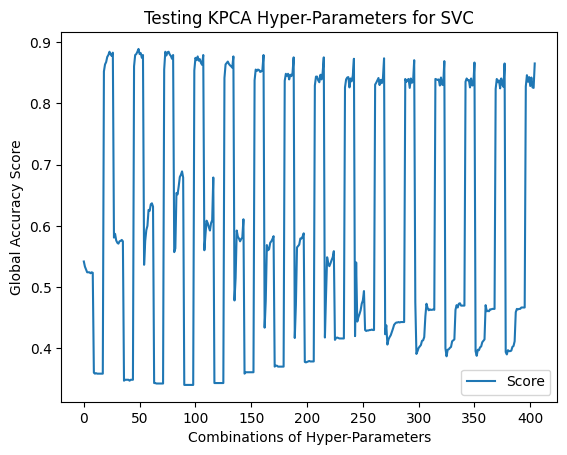

In [78]:
# plot scores from gridsearch for optimal hyperparameters for KPCA and KNN
kpcaallgridscores_svc = list(kpcagrid_searchsvc.cv_results_['mean_test_score'])
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(kpcagrid_searchsvc.best_score_ *100) )
print(kpcagrid_searchsvc.best_params_)

plt.plot(list(range(len(kpcaallgridscores_svc))), kpcaallgridscores_svc, label='Score')
# plt.scatter(k_range[2], allgridscores[2], label='Best Score', color='red')
plt.xlabel('Combinations of Hyper-Parameters')
plt.ylabel('Global Accuracy Score')
plt.title('Testing KPCA Hyper-Parameters for SVC')
plt.legend()

In [76]:
# create table 
kpcasvctable = pd.DataFrame(kpcagrid_searchsvc.cv_results_)
kpcasvctable = kpcasvctable.sort_values(by=['rank_test_score']).head(5)
# to add to pdf
print(kpcasvctable.to_latex(index=False,
                  float_format="{:.5f}".format,))

\begin{tabular}{rrrrllllrrrrrr}
\toprule
 mean\_fit\_time &  std\_fit\_time &  mean\_score\_time &  std\_score\_time & param\_kpca\_\_gamma & param\_kpca\_\_kernel & param\_kpca\_\_n\_components &                                             params &  split0\_test\_score &  split1\_test\_score &  split2\_test\_score &  mean\_test\_score &  std\_test\_score &  rank\_test\_score \\
\midrule
       0.21224 &       0.01080 &          0.02875 &         0.00717 &           0.01286 &               poly &                      100 & \{'kpca\_\_gamma': 0.012857142857142857, 'kpca\_\_ke... &            0.89885 &            0.87356 &            0.89425 &          0.88889 &         0.01100 &                1 \\
       0.19750 &       0.01560 &          0.02492 &         0.00251 &           0.01571 &               poly &                       40 & \{'kpca\_\_gamma': 0.015714285714285715, 'kpca\_\_ke... &            0.88276 &            0.87586 &            0.89425 &          0.88429 &         0.00759

/var/folders/j2/8gptfrvd0_dfl_yxfcck_hh40000gn/T/ipykernel_35091/1772587448.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(kpcasvctable.to_latex(index=False,


In [79]:
# repeat optimal KPCA for KNN
# {'kpca__gamma': 0.012857142857142857, 'kpca__kernel': 'rbf', 'kpca__n_components': 80

xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)

kpcaknn = KernelPCA(n_components=80, kernel='rbf', gamma= 0.012857, fit_inverse_transform=True)
kpcaknn_xtrain = kpcaknn.fit_transform(xtrain)
kpcaknn_xtest = kpcaknn.transform(xtest)

In [95]:
kpcaknn.X_transformed_fit_


array([[-0.21277142,  0.14731507,  0.23991503, ..., -0.02055514,
         0.01997957,  0.02201434],
       [ 0.31388766,  0.06758135,  0.01297636, ..., -0.02127867,
        -0.01608689, -0.07164164],
       [ 0.62469816,  0.2151677 , -0.06077008, ..., -0.02573849,
        -0.02557465,  0.0049011 ],
       ...,
       [ 0.15822169, -0.16593653,  0.03946552, ..., -0.03199136,
        -0.01385336, -0.0491128 ],
       [-0.05214267, -0.31465653,  0.04677777, ..., -0.03082018,
         0.0138571 ,  0.03279394],
       [-0.1124455 ,  0.03292301,  0.21531653, ...,  0.06407949,
         0.02940405, -0.03109827]], dtype=float32)

In [83]:
inversed = kpcaknn.inverse_transform(kpcaknn_xtrain)

In [84]:
inversed.shape

(1109, 1225)

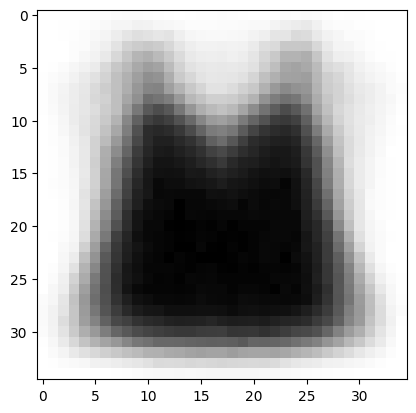

In [91]:
# %matplotlib inline
# plt.figure(figsize = [30,15])
# for i in range(3):
#     plt.subplot(1,3,i+1)
#     im = np.reshape(basis[values[i]],(35,35))
#     plt.imshow(im, cmap='gray_r')
#     print(plt.title("(Label: " + str(label_list[labels[values[i]]]) + ")"))

kpcaimage = np.reshape(inversed[10],(35,35))
plt.imshow(kpcaimage, cmap='gray_r')

In [108]:
xtestinversed = kpcaknn.inverse_transform(kpcaknn_xtest)

In [110]:
knn.fit(inversed, ytrain)
ypredkpcaknn = knn.predict(xtestinversed)
kpca_knnscore = accuracy_score(ypredkpcaknn, ytest)
print(kpca_knnscore)

0.826530612244898
